# Project: Wrangling and Analyze Data

In [1]:
# Import the required libraries and packages

import requests
import json
import tweepy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from functools import reduce
from bs4 import BeautifulSoup
from timeit import default_timer as timer
%matplotlib inline

<hr style="border:10px solid blue">

## Step 1: Gathering Data
Gather **all** three pieces of data for this project and load them in the notebook.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) then upload in this Project Workspace.

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
# twitter_archive_enhanced.head()

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)
> URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
# URL from which tweet image prediction file is downloaded
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# check if status of response == 200
# response.status_code

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
    
# image_predictions.head()

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Twitter developer account credentials
customer_key = ''
customer_secret = ''
access_token = ''
access_secret = ''

In [5]:
# use tweepy to access twitter data
auth = tweepy.OAuthHandler(customer_key, customer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# tweet IDs to gather additional data for, via Twitter API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

2356

In [7]:
# Query Twitter API
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id  in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n') # a new line in a .txt file
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
time_taken = end - start

print("Time taken: " + str(time_taken)) # Check time taken, it takes around 20-45 minutes : (2583.695901509/30)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
18

Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
20

Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
23

In [8]:
# Save tweet_json.txt file in a DataFrame
tweet_json = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet_json.append(json.loads(line))
tweets_data = pd.DataFrame(tweet_json, columns = ['id','retweet_count', 'favorite_count'])

In [9]:
print(len(tweets_data))

2327


In [10]:
print(len(fails_dict))

29


In [ ]:
# # Check columns
# df_tweets.head()

<hr style="border:10px solid blue">

## Step 2: Assessing Data
* Detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 
* You must use **both** visual assessment and programmatic assessement to assess the data.

### 1. Visual Assessment

    1️⃣ The WeRateDogs Twitter archive (twitter_archive_enhanced)
    
    2️⃣ The tweet image predictions (image_predictions)
    
    3️⃣ Additional data from the Twitter API (tweets_data)

#### 1️⃣ The WeRateDogs Twitter archive (twitter_archive_enhanced)

In [12]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 2️⃣ The tweet image predictions (image_predictions)

In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 3️⃣ Additional data from the Twitter API (tweets_data)

In [14]:
tweets_data

,id,retweet_count,favorite_count
0,892420643555336193,7002,33802
1,892177421306343426,5300,29318
2,891815181378084864,3477,22044
3,891689557279858688,7224,36924
4,891327558926688256,7756,35307
5,891087950875897856,2600,17803
6,890971913173991426,1662,10360
7,890729181411237888,15752,56852
8,890609185150312448,3619,24517
9,890240255349198849,6097,27953


### 2. Programmatic Assesment

    1️⃣ The WeRateDogs Twitter archive (twitter_archive_enhanced)
    
    2️⃣ The tweet image predictions (image_predictions)
    
    3️⃣ Additional data from the Twitter API (tweets_data)

In [ ]:
# head(), ----->  Used to get the first n rows of dataset
# tail(), ----->  Used to get the last n rows of dataset
# sample(), ----->  Allows you to take a random sample of elements from a dataset
# info(), ----->  Used to get a concise summary of the dataset
# describe(), ----->  Used for calculating some statistical data like percentile, mean and std of the numerical values of dataset
# isnull().sum(), ----->  Returns the number of missing values in dataset
# unique(), -----> Used to find the unique values in dataset
# value_counts() ----->  Return a Series containing counts of unique values from dataset in decreasing order
# duplicated().sum() ----->  Returns the number of duplicate values in dataset

#### 1️⃣ The WeRateDogs Twitter archive (twitter_archive_enhanced)

In [15]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
twitter_archive_enhanced.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1795,677314812125323265,NaN,NaN,2015-12-17 02:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677314812...,10,10,Tassy,None,None,None,None


In [18]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
twitter_archive_enhanced.duplicated().sum()

0

In [22]:
twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [23]:
twitter_archive_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [24]:
twitter_archive_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
twitter_archive_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [26]:
twitter_archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [27]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Bailey          7
an              7
Toby            7
Buddy           7
Leo             6
Jax             6
Milo            6
Oscar           6
Jack            6
Bella           6
Dave            6
Rusty           6
Koda            6
Scout           6
Stanley         6
Sunny           5
             ... 
Emmie           1
Bruiser         1
Jim             1
Carper          1
Torque          1
Jazz            1
Aiden           1
Wiggles         1
Poppy           1
Mya             1
Brandi          1
Rontu           1
Dylan           1
Damon           1
Clybe           1
Snickers        1
Buddah          1
Robin           1
Dixie           1
Shooter         1
Jersey          1
Fwed            1
Kirk            1
life            1
Longfellow

In [28]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [30]:
# check IDs with zero denominator ratings
twitter_archive_enhanced[twitter_archive_enhanced.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [31]:
# More details ID with zero denominator rating
twitter_archive_enhanced.loc[313]

tweet_id                                                     835246439529840640
in_reply_to_status_id                                               8.35246e+17
in_reply_to_user_id                                                 2.62596e+07
timestamp                                             2017-02-24 21:54:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                            960
rating_denominator                                                            0
name                                    

#### 2️⃣ The tweet image predictions (image_predictions)

In [ ]:
# head(), ----->  Used to get the first n rows of dataset
# tail(), ----->  Used to get the last n rows of dataset
# sample(), ----->  Allows you to take a random sample of elements from a dataset
# info(), ----->  Used to get a concise summary of the dataset
# describe(), ----->  Used for calculating some statistical data like percentile, mean and std of the numerical values of dataset
# isnull().sum(), ----->  Returns the number of missing values in dataset
# unique(), -----> Used to find the unique values in dataset
# value_counts() ----->  Return a Series containing counts of unique values from dataset in decreasing order
# duplicated().sum() ----->  Returns the number of duplicate values in dataset

In [32]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [34]:
image_predictions.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1339,758474966123810816,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,1,Pembroke,0.546145,True,Cardigan,0.2442,True,German_shepherd,0.100429,True


In [35]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
image_predictions.duplicated().sum()

0

In [39]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [40]:
image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
malinois                           20
Samoyed                            20
chow                               20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [41]:
image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

#### 3️⃣ Additional data from the Twitter API (tweets_data)

In [ ]:
# head(), ----->  Used to get the first n rows of dataset
# tail(), ----->  Used to get the last n rows of dataset
# sample(), ----->  Allows you to take a random sample of elements from a dataset
# info(), ----->  Used to get a concise summary of the dataset
# describe(), ----->  Used for calculating some statistical data like percentile, mean and std of the numerical values of dataset
# isnull().sum(), ----->  Returns the number of missing values in dataset
# unique(), -----> Used to find the unique values in dataset
# value_counts() ----->  Return a Series containing counts of unique values from dataset in decreasing order
# duplicated().sum() ----->  Returns the number of duplicate values in dataset

In [42]:
tweets_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,7002,33802
1,892177421306343426,5300,29318
2,891815181378084864,3477,22044
3,891689557279858688,7224,36924
4,891327558926688256,7756,35307


In [43]:
tweets_data.tail()

,id,retweet_count,favorite_count
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,422,2292


In [44]:
tweets_data.sample()

,id,retweet_count,favorite_count
1638,682697186228989953,332,1217


In [45]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id                2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [46]:
tweets_data.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2469.973786,7052.215299
std,6.820795e+16,4183.022421,10959.452141
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1225.000000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2860.000000,8600.500000
max,8.924206e+17,70698.000000,144828.000000


In [47]:
tweets_data.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [48]:
tweets_data.duplicated().sum()

0

### Quality issues

> The followinf are issues found in: `twitter_archive_enhanced`, `image_predictions` and `tweets_data`


1. Erroneous datatypes(tweet_id, timestamp) - `twitter_archive_enhanced`

2. There are retweets and tweet replies but I only need original ratings - `twitter_archive_enhanced`

3. Some missing names are 'None' instead of 'NaN' and othe are dummy such as _a_, an__, the__ - `twitter_archive_enhanced`

4. Source column is in HTML format - `twitter_archive_enhanced`

5. Source column have string datatype instead of category datatype - `twitter_archive_enhanced`

6. Some tweeets have wrong denominator ratings,  - `twitter_archive_enhanced`

7. Decimal ratings are not captured correctly  - `twitter_archive_enhanced`

8. Wrong data types for tweet_id - `image_predictions`

9. * Some names in columns _p1_, _p2_, _p3_ are in uppercase while others in lowercase - columns (p1_conf,p2_conf_p3_conf) should be _confidence_ instead of _conf_ - `image_predictions`

10. ID column name should be "tweet_id" instead of "id" - `tweets_data`

11. Incorrect datatype for tweet_id - `tweets_data`

### Tidiness issues

1. Dog classes (doggo, floofer, pupper, puppo) should be in one column - `twitter_archive_enhanced`

2. All datasets (`twitter_archive_enhanced`, `image_predictions`, `tweets_data`) can be merged into one dataframe

3. __Merge__ some columns then __remove__ unuseful columns (for my analysis) - __in merged dataset__

<hr style="border:10px solid blue">

## Step 3: Cleaning Data

Clean **all** of the issues documented while assessing. 

__Cleaning__ includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [49]:
# Make copies of original pieces of data
twitter_archive_df = twitter_archive_enhanced.copy()
image_pred_df = image_predictions.copy()
tweets_df = tweets_data.copy()

### Quality Issue #1: 
Erroneous datatypes(tweet_id, timestamp) - `twitter_archive_enhanced`

#### Define:
    1. Change tweet_id dtype to string
    2. Change timestamp dtype to datetime

#### Code:


In [50]:
twitter_archive_df['tweet_id'] = twitter_archive_df['tweet_id'].astype(str)

In [51]:
twitter_archive_df['timestamp'] = pd.to_datetime(twitter_archive_df['timestamp'], 
                                                 format = "%Y-%m-%d %H:%M:%S")

#### Test:

In [52]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [53]:
# Check tweet_id dtype
type(twitter_archive_df.tweet_id[0])

str

In [54]:
# Check values in timestamp
twitter_archive_df.timestamp.sample(5)

1295   2016-03-10 17:35:20
1086   2016-06-02 00:32:39
1268   2016-03-15 01:48:55
1001   2016-06-28 23:23:19
741    2016-09-26 19:56:24
Name: timestamp, dtype: datetime64[ns]

### Quality Issue #2: 
There are retweets and tweet replies but I only need original ratings

#### Define
    1. Filter all retweets and replies
    2. Remove and drop all related columns

#### Code

In [55]:
# Filter retweets, replies columns
retweets = twitter_archive_df[pd.notnull(twitter_archive_df['retweeted_status_id'])].index
replies = twitter_archive_df[pd.notnull(twitter_archive_df['in_reply_to_status_id'])].index

In [56]:
# View retweets
retweets

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [57]:
# View replies
replies

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [58]:
# Drop retweets, replies
twitter_archive_df.drop(index=retweets, inplace=True)
twitter_archive_df.drop(index=replies, inplace=True)

In [59]:
# View columns available in dataset
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [60]:
# Drop all columns related to retweets and replies
twitter_archive_df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                                 'retweeted_status_id', 'retweeted_status_user_id', 
                                 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [61]:
# Get a concise summary of the dataset after cleaning
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [62]:
# View columns available in dataset after cleaning
twitter_archive_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Quality Issue #3: 
Some missing names are 'None' instead of 'NaN' and othe are dummy such as _a_, _an_, _the_ - `twitter_archive_enhanced`

#### Define:
    Replace dummy/lowercase names like a, an, the,... with NaN
    Replace "None" entries with "NaN"

#### Code:

In [63]:
# Replace dummy/lowercase names like a, an, the,... with NaN
twitter_archive_df['name'] = twitter_archive_df['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [64]:
# Replace None with NaN
twitter_archive_df.name = twitter_archive_df.name.replace('None', np.nan)

#### Test:

In [65]:
twitter_archive_df['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Bo             6
Bailey         6
Koda           6
Bella          6
Jax            6
Oscar          6
Stanley        6
Scout          5
Leo            5
Louis          5
Chester        5
Dave           5
Rusty          5
Bentley        5
Milo           5
Buddy          5
Gary           4
Chip           4
Winnie         4
              ..
Staniel        1
Edd            1
Pawnd          1
Lilah          1
Bones          1
Jimbo          1
Gin            1
Kenzie         1
Timber         1
Benny          1
Stubert        1
Dudley         1
Sunshine       1
Boston         1
Naphaniel      1
Genevieve      1
Brockly        1
Nimbus         1
Lenox          1
Strider        1
Willem         1
Thor           1
Bell           1
Remy           1
Hubertson      1
Leonard        1
Jameson        1
Alexander     

In [66]:
twitter_archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [67]:
twitter_archive_df.name.isnull().sum()

707

### Quality Issue #4: 
Source column is in HTML format - `twitter_archive_enhanced`

### Quality Issue #5:
Source column have string datatype instead of category datatype - `twitter_archive_enhanced`

#### Define:
    1. Use BeautifulSoup to extract contents in _source_ column
    
    2. Change string datatype to category datatype

#### Code:

In [68]:
twitter_archive_df['source'] = twitter_archive_df.source.apply(lambda x: BeautifulSoup(x).find('a').contents[0])

In [69]:
twitter_archive_df['source'] = twitter_archive_df['source'].astype('category')

#### Test:

In [70]:
twitter_archive_df.source.unique()

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

In [71]:
type(twitter_archive_df.source[0])

bs4.element.NavigableString

### Quality Issue #6: 
Some tweeets have wrong denominator ratings - `twitter_archive_enhanced`

#### Define:
    Replace any value (0, 200) of rating_denominator to 10

#### Code:

In [72]:
twitter_archive_df.rating_denominator = twitter_archive_df.rating_denominator.replace(range(0,200), 10)

#### Test:

In [73]:
twitter_archive_df.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

### Quality Issue #7: 
Decimal ratings are not captured correctly  - `twitter_archive_enhanced`

#### Define:
    Extract tweets with decimal rating correctly
    Clean data

#### Code:

In [74]:
# Extract ratings correctly
ratings = twitter_archive_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

twitter_archive_df.rating_numerator = ratings

# Change 'rating_numerator' to float dtype
twitter_archive_df['rating_numerator'] = twitter_archive_df['rating_numerator'].astype('float64')

# Make 'rating_numerator' consistent
rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(twitter_archive_df['rating_numerator'], twitter_archive_df['rating_denominator'])]

twitter_archive_df['rating_numerator'] = rating_num

# Drop redundant 'rating_numerator'
twitter_archive_df = twitter_archive_df.drop(twitter_archive_df[twitter_archive_df['rating_numerator'] > 20].index)

#### Test:

In [75]:
twitter_archive_df['rating_numerator'].unique()

array([ 13.  ,  12.  ,  14.  ,  13.5 ,  11.  ,   6.  ,  10.  ,   0.  ,
         9.75,   5.  ,  11.27,   3.  ,   7.  ,   8.  ,   9.  ,   4.  ,
        11.26,   2.  ,   1.  ])

### Quality Issue #8: 
Wrong data types for tweet_id - `image_predictions`

#### Define:
    Change dtype for tweet_id in image_predictions to string

#### Code:

In [76]:
image_pred_df['tweet_id'] = image_pred_df['tweet_id'].astype(str)

#### Test:

In [77]:
type(image_pred_df.tweet_id[0])

str

### Quality Issue #9: 
Some names in columns _p1_, _p2_, _p3_ and _name_ are in uppercase while others in lowercase - `twitter_archive_enhanced`, `image_predictions`

#### Define:
    Change those name to start in Capital
    
    Rename the columns using .rename method

#### Code:

In [78]:
image_pred_df['p1'] = image_pred_df['p1'].str.title()
image_pred_df['p2'] = image_pred_df['p2'].str.title()
image_pred_df['p3'] = image_pred_df['p3'].str.title()

In [79]:
image_pred_df.rename(columns = {'p1_conf' : 'p1_confidence', 
                                     'p2_conf' : 'p2_confidence', 
                                     'p3_conf' : 'p3_confidence'}, inplace=True)

#### Test:

In [80]:
image_pred_df['p1'].unique()

array(['Welsh_Springer_Spaniel', 'Redbone', 'German_Shepherd',
       'Rhodesian_Ridgeback', 'Miniature_Pinscher', 'Bernese_Mountain_Dog',
       'Box_Turtle', 'Chow', 'Shopping_Cart', 'Miniature_Poodle',
       'Golden_Retriever', 'Gordon_Setter', 'Walker_Hound', 'Pug',
       'Bloodhound', 'Lhasa', 'English_Setter', 'Hen', 'Desktop_Computer',
       'Italian_Greyhound', 'Maltese_Dog', 'Three-Toed_Sloth', 'Ox',
       'Malamute', 'Guinea_Pig', 'Soft-Coated_Wheaten_Terrier',
       'Chihuahua', 'Black-And-Tan_Coonhound', 'Coho', 'Toy_Terrier',
       'Blenheim_Spaniel', 'Pembroke', 'Llama', 'Chesapeake_Bay_Retriever',
       'Curly-Coated_Retriever', 'Dalmatian', 'Ibizan_Hound',
       'Border_Collie', 'Labrador_Retriever', 'Seat_Belt', 'Snail',
       'Miniature_Schnauzer', 'Airedale', 'Triceratops', 'Swab', 'Hay',
       'Hyena', 'Jigsaw_Puzzle', 'West_Highland_White_Terrier',
       'Toy_Poodle', 'Giant_Schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian_Husky', 'Teddy', 

In [81]:
image_pred_df['p2'].unique()

array(['Collie', 'Miniature_Pinscher', 'Malinois', 'Redbone', 'Rottweiler',
       'English_Springer', 'Mud_Turtle', 'Tibetan_Mastiff',
       'Shopping_Basket', 'Komondor', 'Yorkshire_Terrier',
       'English_Foxhound', 'Bull_Mastiff', 'German_Shepherd', 'Shih-Tzu',
       'Newfoundland', 'Cock', 'Desk', 'Toy_Terrier', 'Toy_Poodle',
       'Otter', 'Chesapeake_Bay_Retriever', 'Siberian_Husky', 'Skunk',
       'Afghan_Hound', 'Bloodhound', 'Barracouta', 'Papillon',
       'Cocker_Spaniel', 'Chow', 'Irish_Terrier', 'Chain_Saw', 'Beagle',
       'Giant_Schnauzer', 'Labrador_Retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'Slug', 'Brittany_Spaniel', 'Standard_Schnauzer',
       'Teddy', 'Armadillo', 'African_Hunting_Dog', 'Vizsla', 'Doormat',
       'Pug', 'Italian_Greyhound', 'Samoyed', 'Pomeranian',
       'Miniature_Poodle', 'Lakeland_Terrier', 'Irish_Setter', 'Swab',
       'Malamute', 'Bath_Towel', 'Border_Collie', 'Leonberg', 'Drake',
       'French_Bulldog', 'Ice_Bear', 

In [82]:
image_pred_df['p3'].unique()

array(['Shetland_Sheepdog', 'Rhodesian_Ridgeback', 'Bloodhound',
       'Miniature_Pinscher', 'Doberman', 'Greater_Swiss_Mountain_Dog',
       'Terrapin', 'Fur_Coat', 'Golden_Retriever',
       'Soft-Coated_Wheaten_Terrier', 'Labrador_Retriever', 'Pekinese',
       'Ibizan_Hound', 'French_Bulldog', 'Malinois', 'Dandie_Dinmont',
       'Borzoi', 'Partridge', 'Bookcase', 'Basenji', 'Miniature_Poodle',
       'Great_Grey_Owl', 'Groenendael', 'Eskimo_Dog', 'Hamster', 'Briard',
       'Papillon', 'Flat-Coated_Retriever', 'Gar', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'Dingo', 'Power_Drill', 'Saluki', 'Great_Pyrenees',
       'West_Highland_White_Terrier', 'Collie', 'Toy_Poodle', 'Vizsla',
       'Acorn', 'Giant_Schnauzer', 'Teddy', 'Common_Iguana', 'Wig',
       'Water_Buffalo', 'Coyote', 'Seat_Belt', 'Kelpie', 'Space_Heater',
       'Brabancon_Griffon', 'Standard_Poodle', 'Beagle',
       'Irish_Water_Spaniel', 'Bluetick', 'Weimaraner',
       'Chesapeake_Bay_Retriever', 'Toilet_Tiss

In [83]:
image_pred_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_confidence', 'p1_dog', 'p2',
       'p2_confidence', 'p2_dog', 'p3', 'p3_confidence', 'p3_dog'],
      dtype='object')

### Quality Issue #10: 
ID column name should be "tweet_id" instead of "id" - `tweets_data`

#### Define:
    Change column name from "id" to "tweet_id"

#### Code:

In [84]:
tweets_df.rename(columns={"id" : "tweet_id"}, inplace = True)

#### Test:

In [85]:
tweets_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Quality Issue #11: 
Incorrect datatype for tweet_id - `tweets_data`

#### Define:
    Change datatype of tweet_id to string

#### Code:

In [86]:
tweets_df['tweet_id'] = tweets_df['tweet_id'].astype(str)

#### Test:

In [87]:
type(tweets_df.tweet_id[0])

str

----------------------------------------------------------------------------------------------

### Tidiness Issue #1: 
Dog stages (doggo, floofer, pupper, puppo) should be in one column - `twitter_archive_enhanced`

#### Define:
    Replace "NaN", "None" with ''
    Create new column "dog_stages" and merge other columns
    Get multiple dog_stages in a single tweet
    Merge 4 columns into one "dog_stages"
    Drop redundant columns
    Change dog_stages dtype to category 

#### Code:

In [88]:
# Replace "NaN" entries with ''
twitter_archive_df.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_df.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_df.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_df.puppo.replace(np.NaN, '', inplace=True)

# Replace "None" entries with ''
twitter_archive_df.doggo.replace('None', '', inplace=True)
twitter_archive_df.floofer.replace('None', '', inplace=True)
twitter_archive_df.pupper.replace('None', '', inplace=True)
twitter_archive_df.puppo.replace('None', '', inplace=True)

In [90]:
# Create column called 'dog_stages' and merge columns of each stage in it
twitter_archive_df['dog_stages'] = twitter_archive_df.doggo + twitter_archive_df.floofer + twitter_archive_df.pupper + twitter_archive_df.puppo

# Get all intermediate stages
twitter_archive_df.loc[twitter_archive_df.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
twitter_archive_df.loc[twitter_archive_df.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
twitter_archive_df.loc[twitter_archive_df.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [91]:
# Drop redundant columns 'doggo', 'floofer', 'pupper', 'puppo'
twitter_archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# Replace '' entries with "NaN"
twitter_archive_df.dog_stages.replace('', np.nan, inplace=True)

In [92]:
# Change dog_stages dtype to category
twitter_archive_df['dog_stages'] = twitter_archive_df['dog_stages'].astype('category')

In [109]:
# Change name of "dog_stages" to "dog_class"
twitter_archive_df.rename(columns={"dog_stages": "dog_class"}, inplace = True)

#### Test:

In [110]:
twitter_archive_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class'],
      dtype='object')

In [112]:
twitter_archive_df.dog_class.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_class, dtype: int64

### Tidiness Issue #2: 
All datasets (`twitter_archive_enhanced`, `image_predictions`, `tweets_data`) can be merged into one dataframe

#### Define:
    Merge 3 datasets into one dataframe

#### Code:

In [113]:
# Collect 3 datasets ... from functools import reduce
data = [twitter_archive_df, image_pred_df, tweets_df]

# Merge collected datasets into one dataset
master_twitter = reduce(lambda left, right:  pd.merge(left, right,on = 'tweet_id'), data)

#### Test:

In [114]:
master_twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_class,jpg_url,...,p1_confidence,p1_dog,p2,p2_confidence,p2_dog,p3,p3_confidence,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7002,33802
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5300,29318
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3477,22044
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,7224,36924
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,7756,35307


In [115]:
master_twitter.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class',
       'jpg_url', 'img_num', 'p1', 'p1_confidence', 'p1_dog', 'p2',
       'p2_confidence', 'p2_dog', 'p3', 'p3_confidence', 'p3_dog',
       'retweet_count', 'favorite_count'],
      dtype='object')

### Tidiness Issue #3: 
__Merge__ some columns then __remove__ unuseful columns (for my analysis)

#### Define:
    Merge some columns then drop redundant columns

#### Code:

In [116]:
master_twitter['dog_breeds'] = [df['p1'] if df['p1_dog'] == True and df['p1_confidence'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_confidence'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_confidence'] > 0.2
                     else np.nan for index, df in master_twitter.iterrows()]

## Drop redundant columns including 'expanded_urls', 'img_num'
master_twitter.drop(['p1', 'p1_dog', 'p1_confidence','p2', 'p2_dog', 'p2_confidence',
                     'p3', 'p3_dog', 'p3_confidence', 'expanded_urls', 'img_num'], axis = 1, inplace=True)

#### Test:

In [117]:
master_twitter.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_class', 'jpg_url', 'retweet_count',
       'favorite_count', 'dog_breeds'],
      dtype='object')

In [118]:
master_twitter.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,retweet_count,favorite_count,dog_breeds
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,7002,33802,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,5300,29318,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3477,22044,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,7224,36924,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,7756,35307,Basset
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2600,17803,Chesapeake_Bay_Retriever
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1662,10360,Appenzeller
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,15752,56852,Pomeranian
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,3619,24517,Irish_Terrier
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,6097,27953,Pembroke


<hr style="border:10px solid blue">

## Step 4: Storing Data
Save master dataset to a CSV file named "twitter_archive_master.csv".

In [119]:
# Save dataset as csv, remove row numbering
master_twitter.to_csv('twitter_archive_master.csv', index=False)

<hr style="border:10px solid blue">

## Step 5: Analyzing and Visualizing Data

#### 1. Most popular dog_breeds

In [120]:
# Column for average rating (rating_numerator) of dog_breeds
x = master_twitter.groupby('dog_breeds')['rating_numerator'].mean().to_frame('average_rating')

# Column for number of dog_breeds
y = master_twitter.groupby('dog_breeds')['dog_breeds'].count().nlargest(20).to_frame('dog_breeds_count')
y.merge(x, left_index = True, right_index = True, how='inner')

,dog_breeds_count,average_rating
dog_breeds,,
Golden_Retriever,136,11.606618
Pembroke,88,11.409091
Labrador_Retriever,87,11.091954
Chihuahua,74,10.702703
Pug,53,10.264151
Chow,39,11.641026
Samoyed,39,11.769231
Pomeranian,37,11.128378
Toy_Poodle,36,11.027778


##### Create a graph representation of most popular dog_breeds

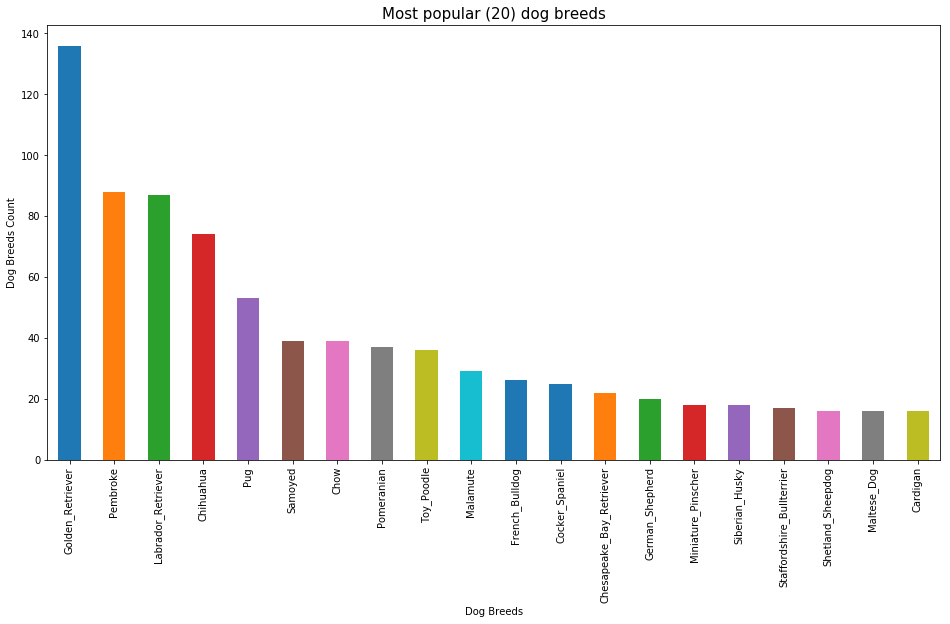

In [121]:
master_twitter['dog_breeds'].value_counts()[0:20].sort_values(ascending=False).plot(kind = 'bar', figsize=(16,8))

plt.title('Most popular (20) dog breeds', size=15)
plt.ylabel('Dog Breeds Count')
plt.xlabel('Dog Breeds')
plt.plot();

> From the 2 analysis above, it is evident that __Golden_Retriever__ is the most popular dog breed

##### 2. What  is the correlation between  favorite_count and  retweet_count

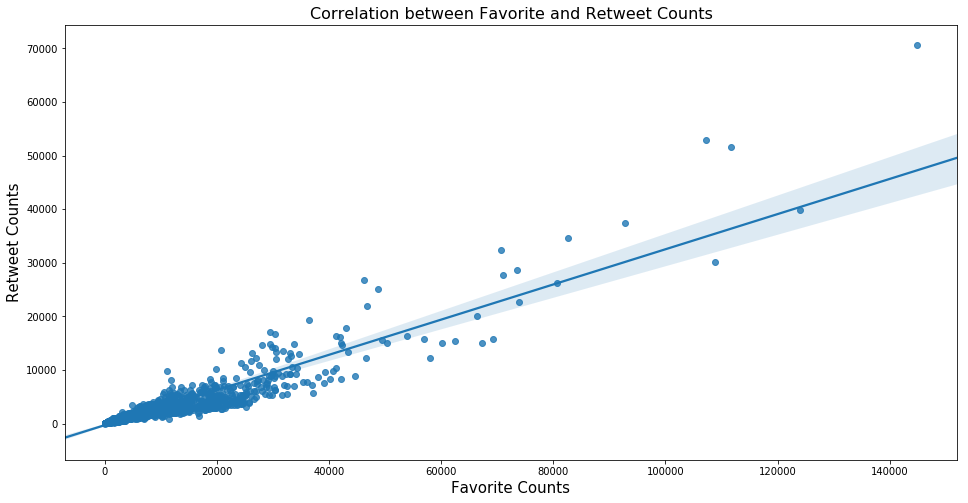

In [122]:
plt.figure(figsize=(16,8))

sns.regplot(x =master_twitter["favorite_count"], y = master_twitter["retweet_count"])

plt.title("Correlation between Favorite and Retweet Counts",fontsize=16)
plt.xlabel("Favorite Counts",fontsize=15)
plt.ylabel("Retweet Counts",fontsize=15)
plt.plot();

> From the graph above, we see that there is a __positive correlation__ between Favorite and Retweet Counts

#### 3. Most popular dog_class

In [123]:
master_twitter.dog_class.value_counts()

pupper            201
doggo              62
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_class, dtype: int64

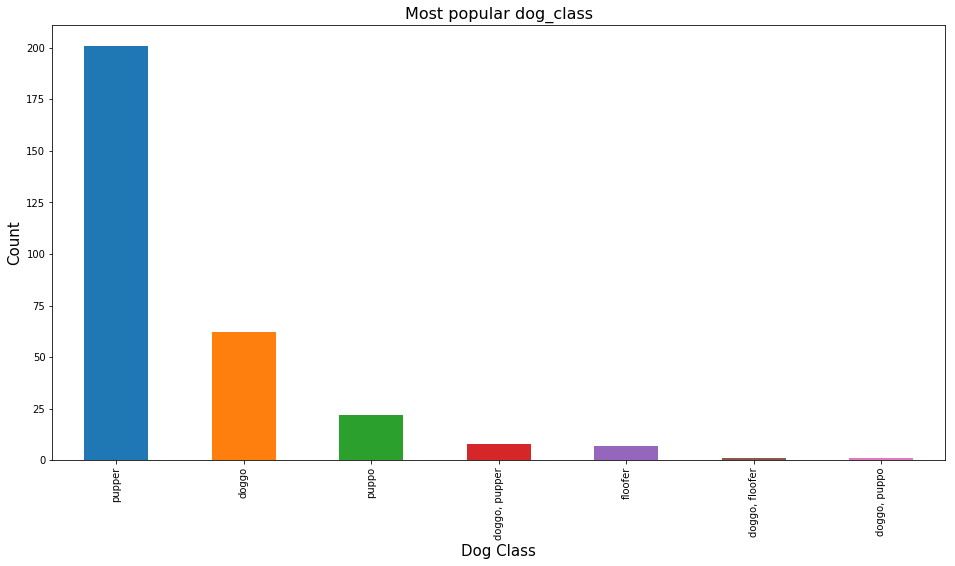

In [128]:
master_twitter['dog_class'].value_counts().sort_values(ascending=False).plot(kind = 'bar', figsize=(16,8))

plt.title("Most popular dog_class", fontsize =16)
plt.xlabel("Dog Class", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.plot();

> From the graph above, we can observe that the most popular dogs class is __pupper__

> There are 7 dog classes where 4 classes are unique and 3 classes are multiple.